## Multivariate LSTM

# Import packages

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

from pandas_datareader import data as wb
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from imblearn.under_sampling import RandomUnderSampler

%matplotlib inline

# Set figure parameters
plt.rcParams['figure.figsize'] = [10, 7.5]


# Input data

C:\Users\User\AppData\Local\Temp\ipykernel_37308\614998373.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(filepath, parse_dates=['Date'])


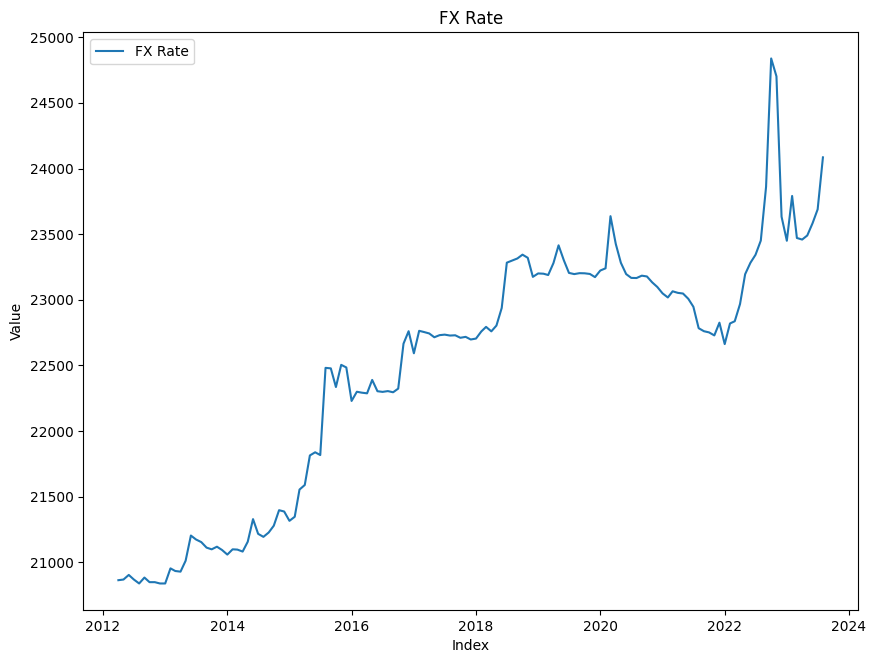

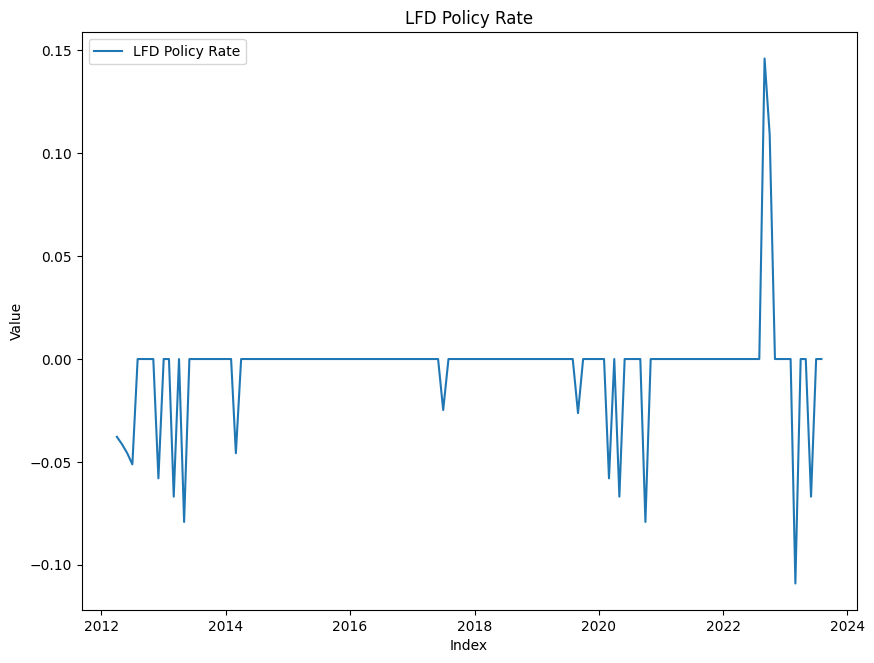

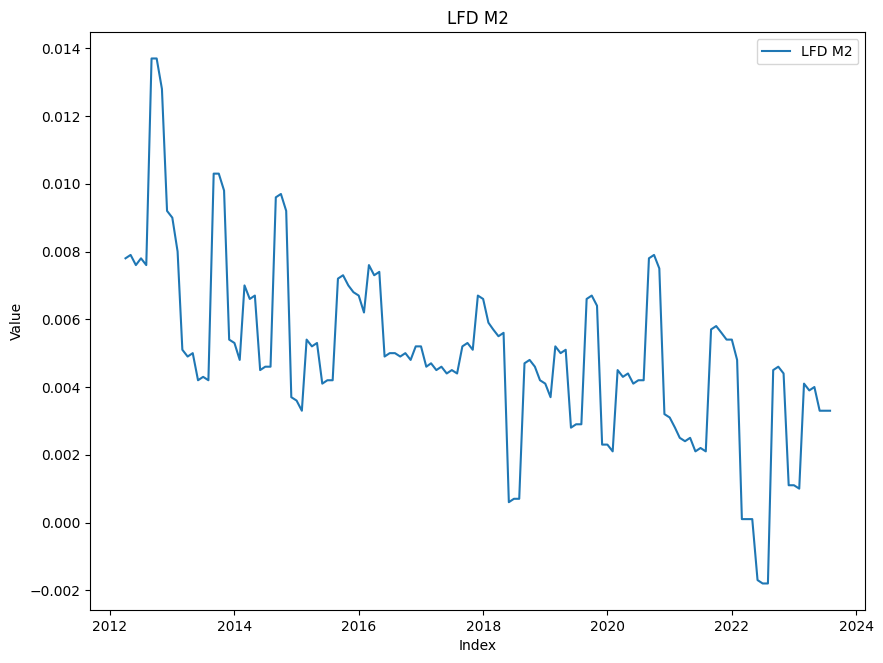

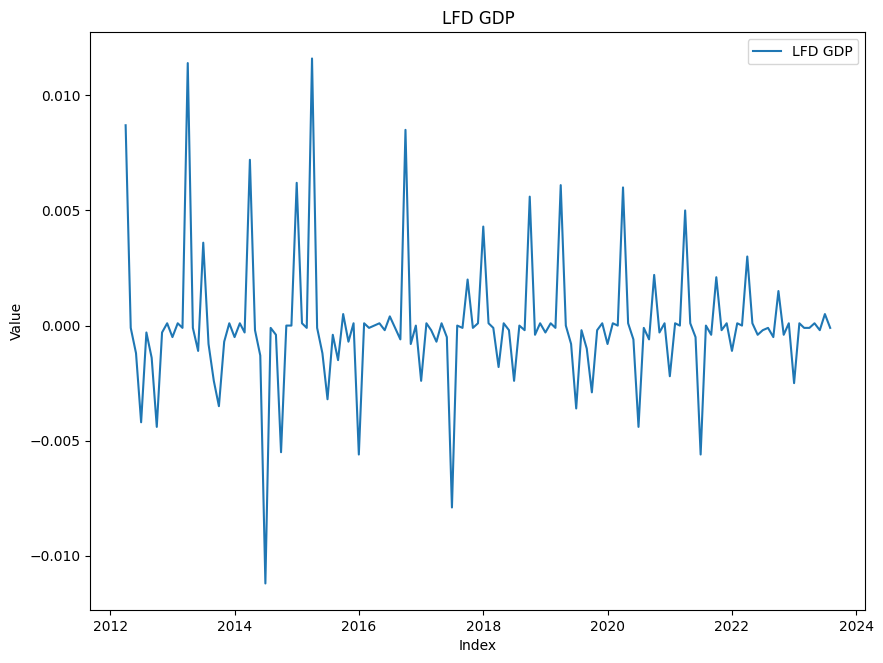

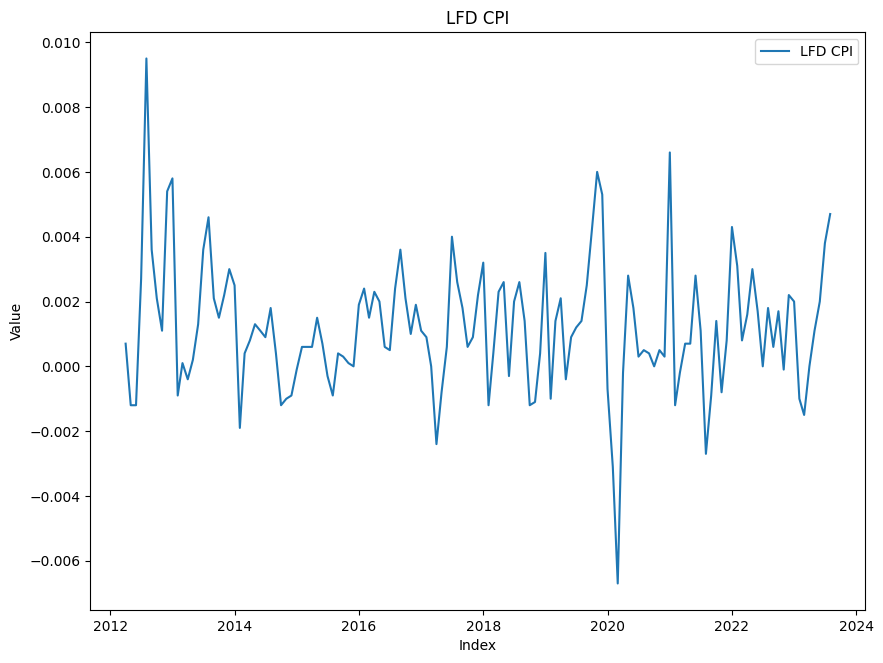

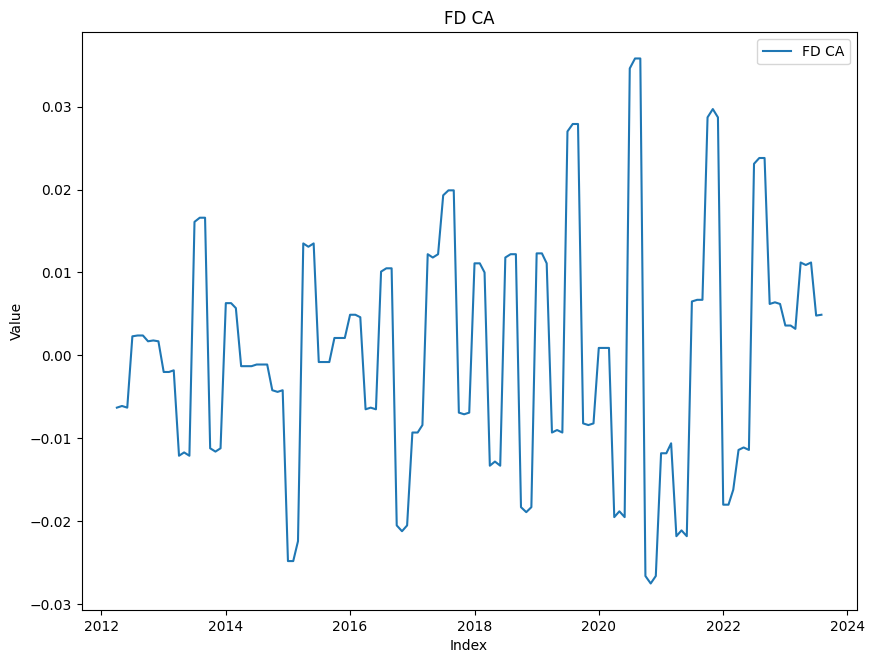

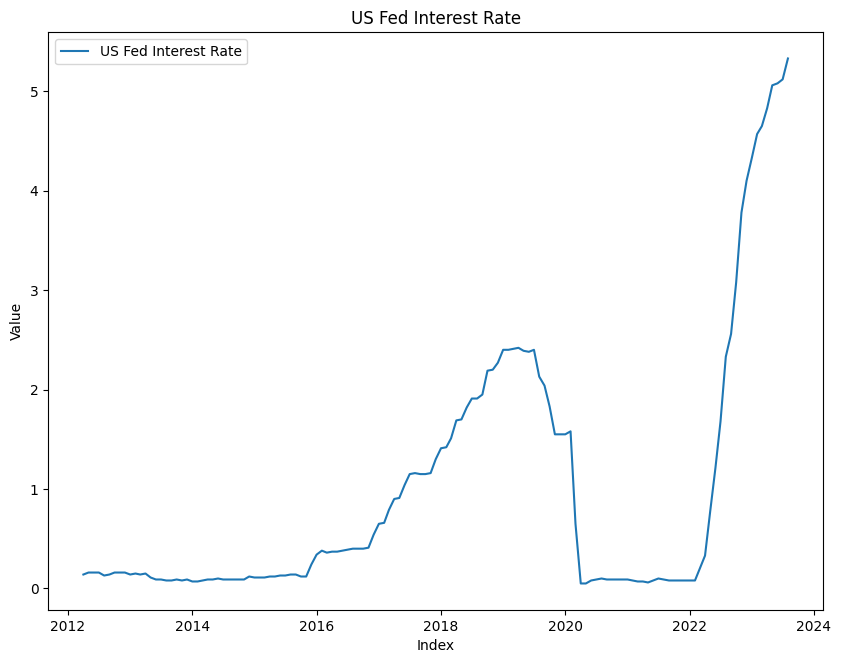

In [40]:
# Filepath to the CSV file
filepath = r"C:\Users\User\Desktop\Clone git\FinalisedData.csv"

# Read the CSV file, specifying the date format
data = pd.read_csv(filepath, parse_dates=['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Retaining only wanted data
data = data[['FX Rate','LFD Policy Rate','LFD M2','LFD GDP','LFD CPI','FD CA','US Fed Interest Rate']]

# Drop rows with NaN values
data.dropna(inplace=True)

# Format datetime
data.index = pd.to_datetime(data.index, format='%b-%y')

# Plot each column separately
for column in data.columns:
    plt.figure()  # Create a new figure for each plot
    plt.plot(data.index, data[column], label=column)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title(column)
    plt.legend()
    plt.show()

# Prepare data

In [41]:
dataset = data.values
dataset = dataset.astype('float32')

In [42]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# separate into train and test data
train_size = int(len(dataset) * 0.66)
test_size = len(dataset) - train_size 
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

In [43]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back= 2):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), :]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [44]:
# reshape input to be [samples, time steps, features]
n = 7 # number of columns
trainX = np.reshape(trainX, (trainX.shape[0], look_back, n))
testX = np.reshape(testX, (testX.shape[0], look_back, n))

# Build model

In [45]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(64, input_shape=(look_back, n)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=300, batch_size=16, verbose=1)

# Save the trained model
model.save('trained_lstm_model.h5')

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = np.squeeze(trainPredict)
testPredict = np.squeeze(testPredict)

Epoch 1/300


C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 821us/step - loss: 0.1863
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0951 
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0510 
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0403 
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0347 
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0374 
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0290 
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0268 
Epoch 9/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0209 
Epoch 10/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0198 
Epoch 11/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0165 
Epoch 12/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0151 
Epoch 13/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0108 
Epoch 14/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0095 
Epoch 15/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0069 
Epoch 16/300
6/6 ━━━━━━━━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


In [46]:
# Transform data
def inverse_transform(arr):
    extended = np.zeros((len(arr), n))
    extended[:, 0] = arr
    return scaler.inverse_transform(extended)[:, 0]


trainPredict = inverse_transform(trainPredict)
testPredict = inverse_transform(testPredict)
trainY = inverse_transform(trainY)
testY = inverse_transform(testY)

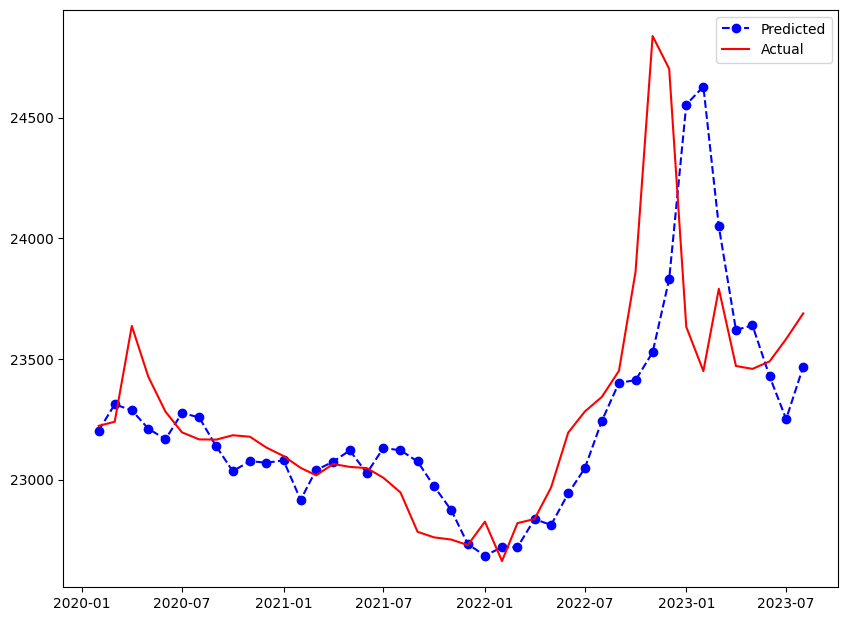

In [47]:
# shift predictions up by one
testPredict = np.delete(testPredict, -1)
testY = np.delete(testY, 0)

to_row = len(data) - len(testY)
date_range = data[to_row:].index
plt.plot(date_range, testPredict, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'Predicted')
plt.plot(date_range, testY, color = 'red', label = 'Actual')
plt.legend()
plt.show()

# Evaluate fit

In [48]:
# RMSE
testScore = np.sqrt(mean_squared_error(testY, testPredict))
testScore = testScore

print('Test Score: %.6f RMSE' % (testScore))

Test Score: 368.527555 RMSE


In [49]:
# R-squared

# Assuming y_true contains the actual values and y_pred contains the predicted values
def r_squared(testY, testPredict):
    # Compute the mean of the actual values
    mean_true = np.mean(testY)
    
    # Compute the total sum of squares (TSS)
    tss = np.sum((testY - mean_true) ** 2)
    
    # Compute the residual sum of squares (RSS)
    rss = np.sum((testY - testPredict) ** 2)
    
    # Compute R-squared
    r2 = 1 - (rss / tss)
    
    return r2

r2 = r_squared(testY, testPredict)
print("R-squared:", r2)


R-squared: 0.31423195604275467


# Forecast 

In [50]:
from tensorflow.keras.models import load_model

def generate_forecasts(model_path, test_data, forecast_steps):
    """
    Generate forecasts beyond the test data using a trained LSTM model.
    
    Args:
    - model_path: Path to the trained LSTM model file.
    - test_data: Test data used for model evaluation.
    - forecast_steps: Number of future time steps to forecast.
    
    Returns:
    - forecasts: Array containing the forecasted values.
    """
    # Load the trained LSTM model
    model = load_model(model_path)
    
    # Prepare the test data for forecasting
    current_data = np.copy(test_data)
    
    # Generate forecasts
    forecasts = []
    for _ in range(forecast_steps):
        # Predict the next time step
        next_step_prediction = model.predict(current_data.reshape(1, *current_data.shape))
        
        # Append the prediction to the forecasts
        forecasts.append(next_step_prediction[0, 0])
        
        # Update current data by removing the oldest time step and appending the latest prediction
        current_data = np.roll(current_data, -1)
        current_data[-1] = next_step_prediction
    
    return np.array(forecasts)

# Example usage:
# Replace 'trained_lstm_model.h5' with the path to your trained LSTM model file
# Replace 'test_data' with your actual test data
# Replace 'forecast_steps' with the number of future time steps to forecast
# forecasts = generate_forecasts('trained_lstm_model.h5', test_data, forecast_steps)


In [51]:
test_data = testX[-1]
forecast_steps = 10

In [52]:
forecasts = generate_forecasts('trained_lstm_model.h5', test_data, forecast_steps)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


In [53]:
forecasts = np.squeeze(forecasts)

# Transform data
def inverse_transform(arr):
    extended = np.zeros((len(arr), n))
    extended[:, 0] = arr
    return scaler.inverse_transform(extended)[:, 0]

forecasts = inverse_transform(forecasts)

In [54]:
from pandas.tseries.offsets import DateOffset
future_dates = [data.index[-1] + DateOffset(months = x) for x in range (0,forecast_steps+1)]
future_dates_df = pd.DataFrame(index = future_dates[1:], columns = data.columns)

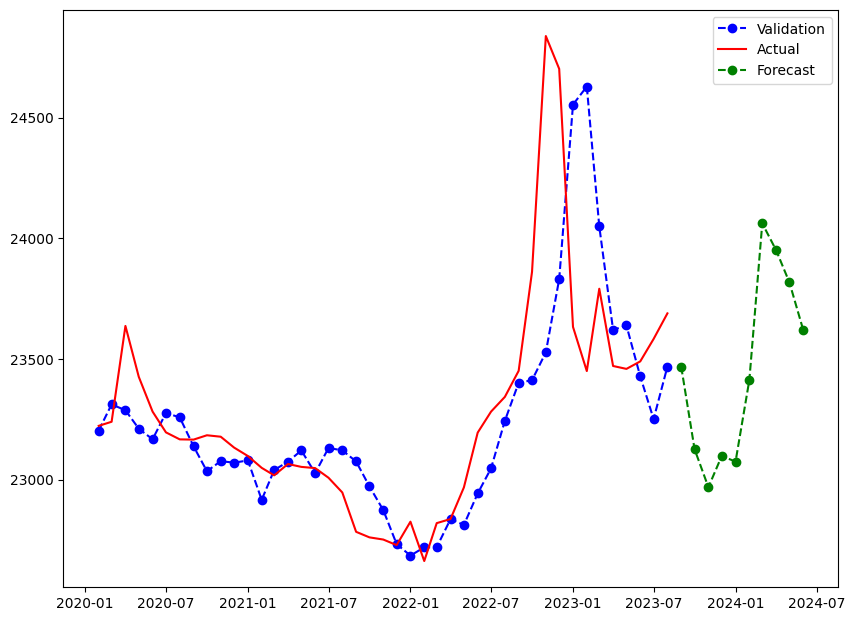

In [55]:
plt.plot(date_range, testPredict, color = 'blue', marker = 'o', linestyle = 'dashed', label = 'Validation')
plt.plot(date_range, testY, color = 'red', label = 'Actual')
plt.plot(future_dates_df.index, forecasts, color = 'green', marker = 'o', linestyle = 'dashed', label = 'Forecast')
plt.legend()